1. 데이터 불러오기& 확인
2. 탐색적 데이터 분석(EDA)
3. 특성공학(데이터 전처리, feature engineering)
4. 모델링 -> 모델 -> 예측/분류 -> 결과 제출

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [3]:
dfTrain=pd.read_csv("train.csv", parse_dates=['datetime'])
dfTest=pd.read_csv("test.csv", parse_dates=['datetime'])
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   

In [4]:
dfTrain.head()


# 1 -> 1000
# 2 -> 0100
# 3 -> 0010
# 4 -> 0001

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#퀴즈1, 각 컬럼별 결측값의 비율 출력
- datetime 0.00%
- ...
- count 0.00%

In [6]:
dfTrain['datetime'].isnull().sum()
#True=1, False=0
#0+0+...+0 -> sum -> 0

0

In [7]:
#dfTrain.apply(lambda x: x.isnull().sum()/len(dfTrain))
dfTrain.isnull().sum() / len(dfTrain)
dfTrain.isnull().sum(axis=0) #각 열을 기준으로 null 합
dfTrain.isnull().sum(axis=1) #각 행을 기준으로 null 합

for c in dfTrain.columns:
    print("col:{:>10}\t Percent of NaN :{:.2f}%".format(
        c, dfTrain.isnull()[c].sum() / dfTrain.shape[0]#len(dfTrain)
))

col:  datetime	 Percent of NaN :0.00%
col:    season	 Percent of NaN :0.00%
col:   holiday	 Percent of NaN :0.00%
col:workingday	 Percent of NaN :0.00%
col:   weather	 Percent of NaN :0.00%
col:      temp	 Percent of NaN :0.00%
col:     atemp	 Percent of NaN :0.00%
col:  humidity	 Percent of NaN :0.00%
col: windspeed	 Percent of NaN :0.00%
col:    casual	 Percent of NaN :0.00%
col:registered	 Percent of NaN :0.00%
col:     count	 Percent of NaN :0.00%


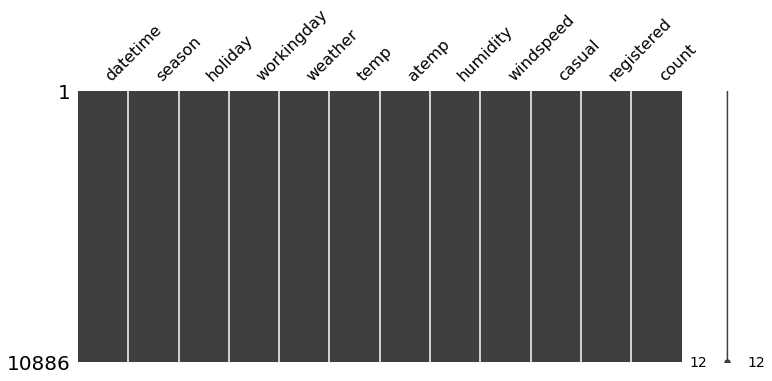

In [8]:
msno.matrix(dfTrain, figsize=(12,5)) #1=72pix

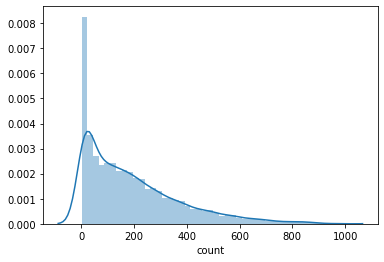

In [9]:
sns.distplot(dfTrain['count'])

In [10]:
# skewness(비대칭도): 분포가 얼마나 비대칭인지를 알려주는 척도
#     0이면 정규분포, <0이면 오른쪽으로 치우침, >0이면 왼쪽으로 치우짐
dfTrain['count'].skew()

1.2420662117180776

In [11]:
#kurtosis(첨도): 확률분포의 뾰족한 정도
#0:표준정규분포
#<0:표준정규분포보다 넓게 퍼져있다(둥글다)
#>0:        "        뾰족하다
dfTrain['count'].kurt()

1.3000929518398334

In [12]:
dfTrain['year']=dfTrain['datetime'].dt.year
dfTrain['month']=dfTrain['datetime'].dt.month
dfTrain['day']=dfTrain['datetime'].dt.day
dfTrain['hour']=dfTrain['datetime'].dt.hour
dfTrain['dayofweek']=dfTrain['datetime'].dt.dayofweek

In [13]:
dfTest['year']=dfTest['datetime'].dt.year
dfTest['month']=dfTest['datetime'].dt.month
dfTest['day']=dfTest['datetime'].dt.day
dfTest['hour']=dfTest['datetime'].dt.hour
dfTest['dayofweek']=dfTest['datetime'].dt.dayofweek

x축-년/월/일/시, y축-count

In [14]:
dfTrain['count']
#퀴즈 2
dfTrain['year']
dfTrain['month']
dfTrain['day']
dfTrain['hour']

#퀴즈 2
#dfTrain을 ['year']별로 그룹화를 한다음, 그룹별 count의 합계와 평균을 출력



0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

In [15]:
dfTrain.groupby(['year'])['count'].sum()
dfTrain.groupby(['year'])[['count']].sum()
dfTrain.groupby(['year'])['count'].mean()
dfTrain.groupby(['year'])[['count']].mean()

,count
year,
2011,144.223349
2012,238.560944


In [16]:
dfTrain.pivot_table(index='year', values='count') #디폴트 : 평균
dfTrain.pivot_table(index='year', values='count', aggfunc='mean')
dfTrain.pivot_table(index='year', values='count', aggfunc='sum')
dfTrain.pivot_table(index='year', values='count', aggfunc=['sum','mean'])

,sum,mean
,count,count
year,,
2011,781979,144.223349
2012,1303497,238.560944


In [17]:
import matplotlib.pyplot as plt

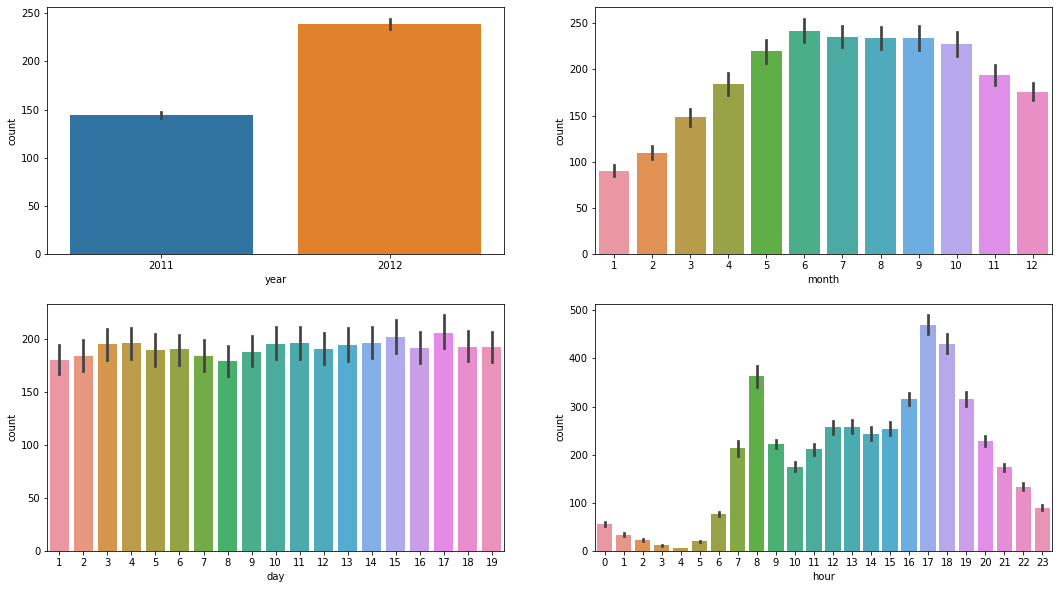

In [18]:
#sns.barplot(data=dfTrain) 
#barplot에서 y축 별도로 설정하지 않으면, 전체 평균값
#barplot에서 y축을 설정하면, 설정된 컬럼의 평균값


fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18,10)

sns.barplot(data=dfTrain, x='year', y='count', ax=axes[0][0]) #연도별 count의 평균
sns.barplot(data=dfTrain, x='month', y='count', ax=axes[0][1])
sns.barplot(data=dfTrain, x='day', y='count', ax=axes[1][0])
sns.barplot(data=dfTrain, x='hour', y='count', ax=axes[1][1])

In [19]:
dfTrain['dayofweek']=dfTrain['datetime'].dt.dayofweek
#0:월요일, 6일:일요일
dfTest['dayofweek']=dfTest['datetime'].dt.dayofweek
dfTrain.shape

(10886, 17)

In [20]:
#퀴즈3.
#각 요일별 데이터 건수를 출력
dfTrain.groupby('dayofweek').size()
#0(월요일) : 1551건 데이터
#...
#6(일요일) : 1579건 데이터

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
dtype: int64

In [21]:
dfTrain.groupby("dayofweek")["datetime"].count()

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: datetime, dtype: int64

In [22]:
dfTrain['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

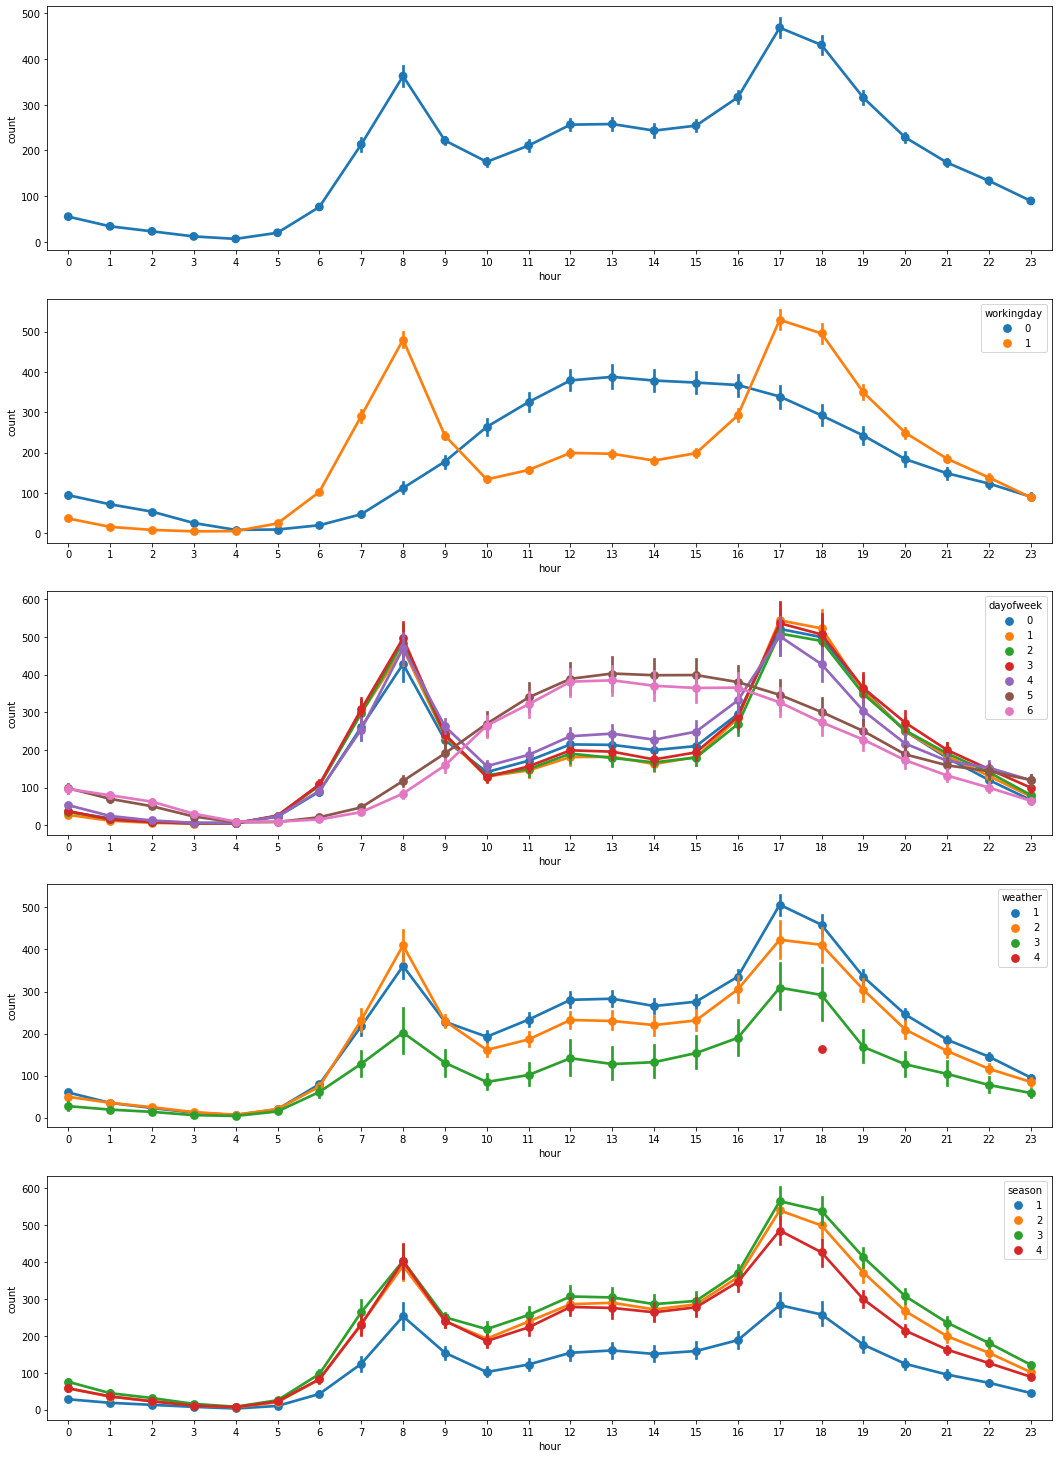

In [23]:
#x축 hour로 고정하고, y축 count -> 시간의 흐름에 따른 대여량 변화가 어떤 패턴이 있는지?

fig, axes=plt.subplots(nrows=5)
fig.set_size_inches(18,26)

sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[0])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='workingday', ax=axes[1])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='dayofweek', ax=axes[2])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='weather', ax=axes[3])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='season', ax=axes[4])


In [24]:
#상관계수행렬

In [25]:
dfTrain.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [26]:
cData=dfTrain[['temp','atemp', 'humidity', 'windspeed','casual', 'registered','count']]

In [27]:
cData.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


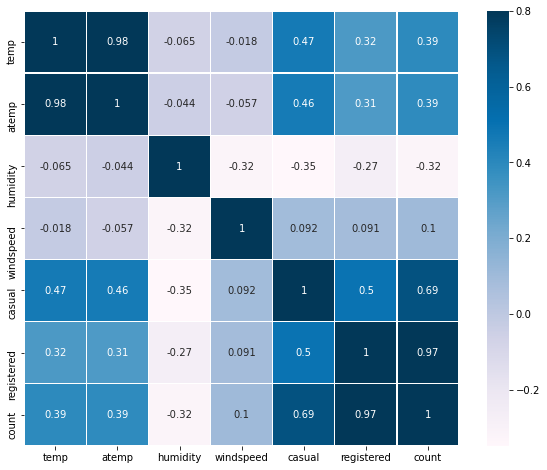

In [28]:
plt.subplots(figsize=(10,8))
sns.heatmap(cData.corr(), linecolor='white', linewidths=0.2, square=True,
            annot=True,cmap=plt.cm.PuBu, vmax=0.8, annot_kws={'size':10})

In [29]:
#다중공선성 : 독립변수들 간에 선형 독립이 아닌 경우
#예측모델의 일부 독립 변수가 다른 독립변수와 상관 관계가 높아서,
#데이터 분석하는 과정 부정적인 영향을 주게되는 현상

#독립변수(x), 종속변수(y)
#y=x1+x2+...+5

# ex) 학업성취도와 음주사이의 관계(영향)? 회귀분석
# 학업성취도(y), 하루음주량(x1), 혈중알콜농도(x2)
# 학업성취도(y),  음주를 즐기는 정도(x)

# 교통사고량(y), 빙판길(x1), 눈(x2), 영하(x3), ... => 회귀모델 x, 다중공선성 제거
# 교통사고량(y), 겨울(x)  => 회귀모델 작성



# 하루음주량와 혈중알콜농도가 독립? 아님. 매우 높은 상관관계가 있음 =>다중공선성 존재

# 다중공선성 해결?
# vif 값을 조사 -> 10 이상이면 다중공선성이 있는 것으로 간주 -> 변수를 제거(변수 선택)/차원축소(pca, 주성분분석)





In [30]:
# dfTrain['count']
# dfTrain['temp']
pd.concat([dfTrain['count'], dfTrain['temp']], axis=1)

,count,temp
0,16,9.84
1,40,9.02
2,32,9.02
3,13,9.84
4,1,9.84
...,...,...
10881,336,15.58
10882,241,14.76
10883,168,13.94
10884,129,13.94


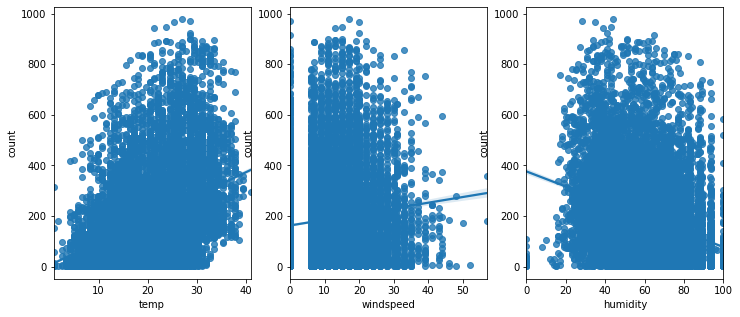

In [31]:
# x축: temp, windspeed, humidity
# y축: count
# scatter plot
fig, axes=plt.subplots(ncols=3, figsize=(12,5)) # 1 = 72pixel   

tdata=   pd.concat([dfTrain['count'], dfTrain['temp']],axis=1)
sns.regplot(x="temp", y="count", data=tdata, scatter=True, ax=axes[0])
wdata=   pd.concat([dfTrain['count'], dfTrain['windspeed']],axis=1)
sns.regplot(x="windspeed", y="count", data=wdata, scatter=True, ax=axes[1])
hdata=   pd.concat([dfTrain['count'], dfTrain['humidity']],axis=1)
sns.regplot(x="humidity", y="count", data=hdata, scatter=True, ax=axes[2])

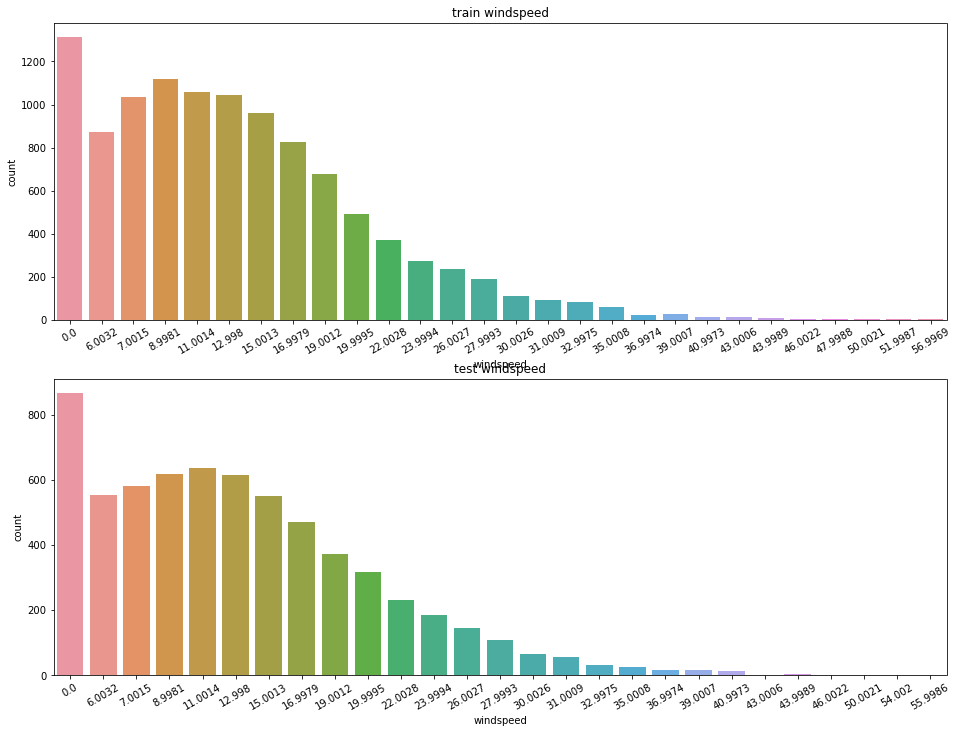

In [32]:
fig, axes =plt.subplots(nrows=2, figsize=(16,12))

plt.sca(axes[0])
plt.xticks(rotation=30)
axes[0].set(ylabel="count", title="train windspeed")
sns.countplot(data=dfTrain, x="windspeed", ax=axes[0])
#countplot:카테고리별로 데이터의 개수를 출력, 데이터프레임에서만 사용가능


plt.sca(axes[1])
plt.xticks(rotation=30)
axes[1].set(ylabel="count", title="test windspeed")
sns.countplot(data=dfTest, x="windspeed", ax=axes[1])

In [33]:
#x축: year와 month 기준으로 y축 : count 값 출력
#2011-1 ~ 2012-12, count

#dfTrain의 datetime에서 연도, 월 추출 => 연도와 월을 결합한 새로운 컬럼 생성

def myconcat(dt):
    return "{0}-{1}".format(dt.year, dt.month)

dfTrain['ym']=dfTrain['datetime'].apply(myconcat)
dfTest['ym']=dfTest['datetime'].apply(myconcat)
#dfTest['datetime']

In [34]:
dfTrain[['datetime', 'ym']]
dfTest[['datetime', 'ym']]

,datetime,ym
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1
...,...,...
6488,2012-12-31 19:00:00,2012-12
6489,2012-12-31 20:00:00,2012-12
6490,2012-12-31 21:00:00,2012-12
6491,2012-12-31 22:00:00,2012-12


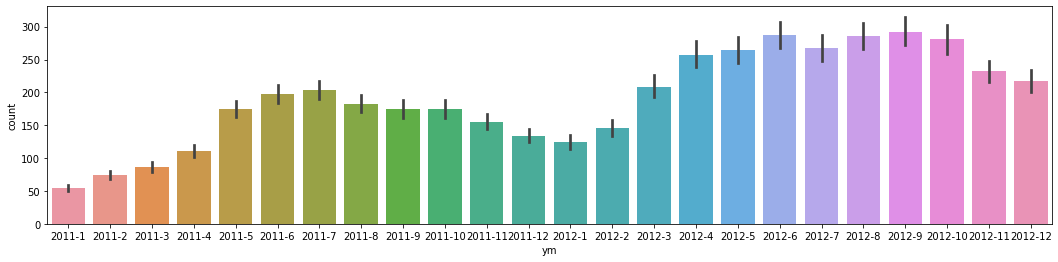

In [35]:
plt.subplots(figsize=(18,4))
sns.barplot(data=dfTrain, y='count',x='ym')

In [36]:
import numpy as np

In [37]:
from collections import Counter
Counter('hello world').most_common() 
Counter('hello world').most_common(1)

[('l', 3)]

In [38]:
def detectOutliers(df, features):
    outlierIndices=[]
    for col in features:
        Q1=np.percentile(df[col], 25) #25%지점의 값(q1)
        Q3=np.percentile(df[col], 75) #75%지점의 값(q3)
        IQR=Q3-Q1
        outlierStep=IQR*1.5    
        
        outlierCol=df[(df[col] < Q1-outlierStep) | (df[col] > Q3+outlierStep)].index
        #print(outlierCol)
        outlierIndices.extend(outlierCol)
        
    #print(outlierIndices)        
    oi=Counter(outlierIndices)
    mulipleOutliers=[k for k, v in oi.items() if v > 2]
    return mulipleOutliers
    
OutliersToDrop=detectOutliers(dfTrain,["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])    
#최소 3개 이상의 컬럼에서  outlier가 발생한 데이터의 index 번호 리스트(제거 대상)


In [39]:
dfTrain.loc[OutliersToDrop]

dfTrain=dfTrain.drop(OutliersToDrop, axis=0).reset_index(drop=True)
dfTrain.shape

(10846, 18)

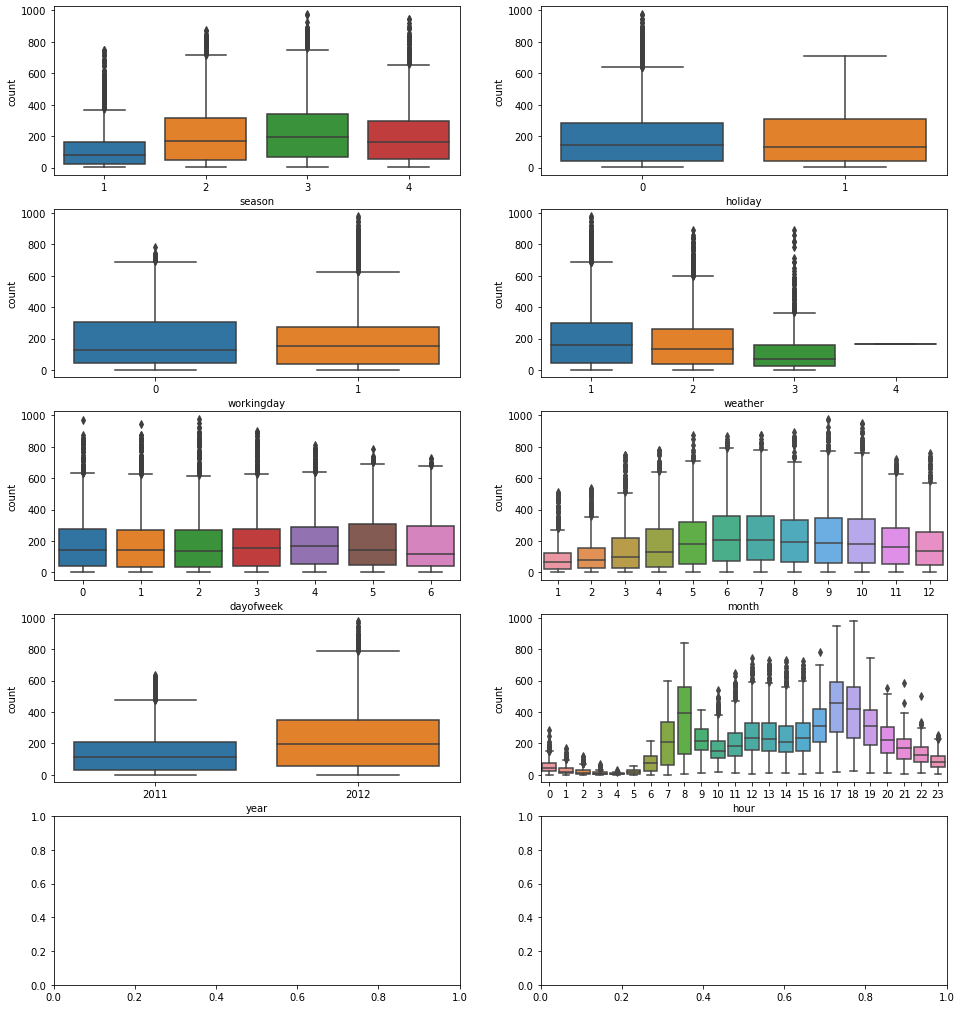

In [40]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18)) 
sns.boxplot(data = dfTrain, y="count", x = "season", orient = "v", ax = axes[0][0]) 
sns.boxplot(data = dfTrain, y="count", x = "holiday", orient = "v", ax = axes[0][1]) 
sns.boxplot(data = dfTrain, y="count", x = "workingday", orient = "v", ax = axes[1][0]) 
sns.boxplot(data = dfTrain, y="count", x = "weather", orient = "v", ax = axes[1][1]) 
sns.boxplot(data = dfTrain, y="count", x = "dayofweek", orient = "v", ax = axes[2][0]) 
sns.boxplot(data = dfTrain, y="count", x = "month", orient = "v", ax = axes[2][1]) 
sns.boxplot(data = dfTrain, y="count", x = "year", orient = "v", ax = axes[3][0]) 
sns.boxplot(data = dfTrain, y="count", x = "hour", orient = "v", ax = axes[3][1])

In [41]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10846 entries, 0 to 10845
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10846 non-null  datetime64[ns]
 1   season      10846 non-null  int64         
 2   holiday     10846 non-null  int64         
 3   workingday  10846 non-null  int64         
 4   weather     10846 non-null  int64         
 5   temp        10846 non-null  float64       
 6   atemp       10846 non-null  float64       
 7   humidity    10846 non-null  int64         
 8   windspeed   10846 non-null  float64       
 9   casual      10846 non-null  int64         
 10  registered  10846 non-null  int64         
 11  count       10846 non-null  int64         
 12  year        10846 non-null  int64         
 13  month       10846 non-null  int64         
 14  day         10846 non-null  int64         
 15  hour        10846 non-null  int64         
 16  dayofweek   10846 non-

범주형으로 만들기

In [42]:
dfTrain.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'ym'],
      dtype='object')

In [43]:
cfn=['season', 'holiday', 'workingday', 'weather','year', 'month','hour', 'dayofweek']


In [44]:
for v in cfn:
    dfTrain[v]=dfTrain[v].astype('category')
    dfTest[v]=dfTest[v].astype('category')

In [46]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10846 entries, 0 to 10845
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10846 non-null  datetime64[ns]
 1   season      10846 non-null  category      
 2   holiday     10846 non-null  category      
 3   workingday  10846 non-null  category      
 4   weather     10846 non-null  category      
 5   temp        10846 non-null  float64       
 6   atemp       10846 non-null  float64       
 7   humidity    10846 non-null  int64         
 8   windspeed   10846 non-null  float64       
 9   casual      10846 non-null  int64         
 10  registered  10846 non-null  int64         
 11  count       10846 non-null  int64         
 12  year        10846 non-null  category      
 13  month       10846 non-null  category      
 14  day         10846 non-null  int64         
 15  hour        10846 non-null  category      
 16  dayofweek   10846 non-

In [117]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "month","hour", "dayofweek", "holiday", "workingday"
                ]


In [118]:
xTrain=dfTrain[feature_names]
xTrain.shape

(10846, 11)

In [119]:
xTest=dfTest[feature_names]
xTest.shape

(6493, 11)

In [120]:
labelName='count'

In [121]:
yTrain=dfTrain[labelName] # 트레이닝 데이터들의 정답 데이터

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rfModel=RandomForestRegressor(n_estimators=200,random_state=43) # estimator : 트리개수
# random_state 설정을해야 바뀌지않음

In [124]:
rfModel.fit(xTrain,yTrain)# 모델.fit(문제,정답)

RandomForestRegressor(n_estimators=200, random_state=43)

In [125]:
rfModel.predict(xTrain)

array([ 22.405,  34.45 ,  26.645, ..., 179.39 , 136.415,  94.59 ])

In [126]:
yTrain

0         16
1         40
2         32
3         13
4          1
        ... 
10841    336
10842    241
10843    168
10844    129
10845     88
Name: count, Length: 10846, dtype: int64

In [127]:
rfModel.predict(xTest)

array([ 10.745,   4.88 ,   3.65 , ..., 143.94 , 113.385,  64.52 ])

In [128]:
predsTest=rfModel.predict(xTest)

In [129]:
sub=pd.read_csv("sampleSubmission.csv")
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [130]:
sub['count']=predsTest
sub

,datetime,count
0,2011-01-20 00:00:00,10.745
1,2011-01-20 01:00:00,4.880
2,2011-01-20 02:00:00,3.650
3,2011-01-20 03:00:00,3.865
4,2011-01-20 04:00:00,3.050
...,...,...
6488,2012-12-31 19:00:00,293.520
6489,2012-12-31 20:00:00,201.715
6490,2012-12-31 21:00:00,143.940
6491,2012-12-31 22:00:00,113.385


In [131]:
sub.to_csv("mysubmission.csv",index=False)

In [132]:
yTrainLog=np.log1p(yTrain) # 로그 정규화하기

In [133]:
preds=rfModel.predict(xTest)
preds

array([ 10.745,   4.88 ,   3.65 , ..., 143.94 , 113.385,  64.52 ])

In [134]:
preds=np.exp(preds)

<ipython-input-134-c2578def2ce8>:1: RuntimeWarning: overflow encountered in exp
  preds=np.exp(preds)


In [135]:
sub=pd.read_csv("sampleSubmission.csv")
sub['count']=preds
sub

,datetime,count
0,2011-01-20 00:00:00,4.639746e+04
1,2011-01-20 01:00:00,1.316307e+02
2,2011-01-20 02:00:00,3.847467e+01
3,2011-01-20 03:00:00,4.770327e+01
4,2011-01-20 04:00:00,2.111534e+01
...,...,...
6488,2012-12-31 19:00:00,2.979314e+127
6489,2012-12-31 20:00:00,4.015239e+87
6490,2012-12-31 21:00:00,3.253477e+62
6491,2012-12-31 22:00:00,1.747752e+49


In [136]:
sub.to_csv("mysubmission55.csv",index=False)